In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import geopandas as gpd

plt.style.use('ggplot')
pd.set_option('display.max_columns', 30)

In [3]:
# import trip data
df = pd.read_csv('data/citibike_ZIP.csv')
df.head()

,tripduration,starttime,stoptime,start_id,start_name,start_lat,start_lon,end_id,end_name,end_lat,end_lon,bikeid,usertype,birth_year,gender,weekday,hour,geometry,zip_start,zip_end
0,17.700000,2020-06-01 00:00:03.372,2020-06-01 00:17:46.208,3419,Douglass St & 4 Ave,40.679279,-73.981540,3419,Douglass St & 4 Ave,40.679279,-73.981540,39852,Customer,1997,2,0,0,POINT (989370.1838770027 186756.53892500512),11217,11217.0
1,63.500000,2020-06-01 00:00:03.553,2020-06-01 01:03:33.936,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,336,Sullivan St & Washington Sq,40.730477,-73.999061,37558,Subscriber,1969,0,0,0,POINT (992875.4144866021 191851.65323921342),11205,10012.0
2,16.950000,2020-06-01 00:00:09.614,2020-06-01 00:17:06.833,389,Broadway & Berry St,40.710446,-73.965251,3562,Classon Ave & St Marks Ave,40.676520,-73.959608,37512,Customer,1988,2,0,0,POINT (993883.8241576733 198112.87322040228),11249,11238.0
3,3.766667,2020-06-01 00:00:12.178,2020-06-01 00:03:58.864,3255,8 Ave & W 31 St,40.750585,-73.994685,505,6 Ave & W 33 St,40.749013,-73.988484,39674,Customer,1969,0,0,0,POINT (985722.6805079061 212735.19209770544),10001,10001.0
4,23.950000,2020-06-01 00:00:21.255,2020-06-01 00:24:18.965,367,E 53 St & Lexington Ave,40.758281,-73.970694,497,E 17 St & Broadway,40.737050,-73.990093,21093,Customer,1997,2,0,0,POINT (992368.8021711168 215540.1540624901),10022,10003.0


In [17]:
# import zip code file
zip_shp = gpd.read_file('nyc_zip/ZIP_CODE_040114.shp')[['ZIPCODE', 'geometry']]
zip_shp['ZIPCODE'] = zip_shp['ZIPCODE'].astype(int)
zip_shp.head()

,ZIPCODE,geometry
0,11436,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [15]:
zip_count = df.groupby('zip_start', as_index=False)[['bikeid']].count()
zip_count.columns = ['ZIPCODE','trips_count']
zip_count

,ZIPCODE,trips_count
0,83,70803
1,10001,63816
2,10002,78029
3,10003,92930
4,10004,10921
...,...,...
67,11237,13659
68,11238,35123
69,11249,32680
70,11251,3706


In [18]:
zip_shp = zip_shp.merge(
    zip_count, 
    on= 'ZIPCODE',
    how='left')
zip_shp.head()

,ZIPCODE,geometry,trips_count
0,11436,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",NaN
1,11213,"POLYGON ((1001613.713 186926.440, 1002314.243 ...",NaN
2,11212,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",NaN
3,11225,"POLYGON ((995908.365 183617.613, 996522.848 18...",9237.0
4,11218,"POLYGON ((991997.113 176307.496, 992042.798 17...",NaN


In [20]:
# fill in 0 for zipcodes that have no trips
zip_shp['trips_count'].fillna(0, inplace=True)
zip_shp['avg_duration'].fillna(0, inplace=True)

In [ ]:
# plotting top 10 zipcodes with greatest number of originating trips

In [48]:
zip_count_10 = df.groupby('zip_start', as_index=False)[['bikeid']].count().\
    sort_values('bikeid', ascending = False).head(10)
zip_count_10.columns = ['ZIPCODE','count']
zip_count_10 = zip_count_10[::-1]
zip_count_10 

,ZIPCODE,count
1,10001,63816
7,10009,65730
16,10019,66117
13,10016,66265
53,11201,67713
12,10014,70719
0,83,70803
2,10002,78029
9,10011,79733
3,10003,92930


In [49]:
zip_list = list(zip_count_10['ZIPCODE'])
zip_list

[10001, 10009, 10019, 10016, 11201, 10014, 83, 10002, 10011, 10003]

[]

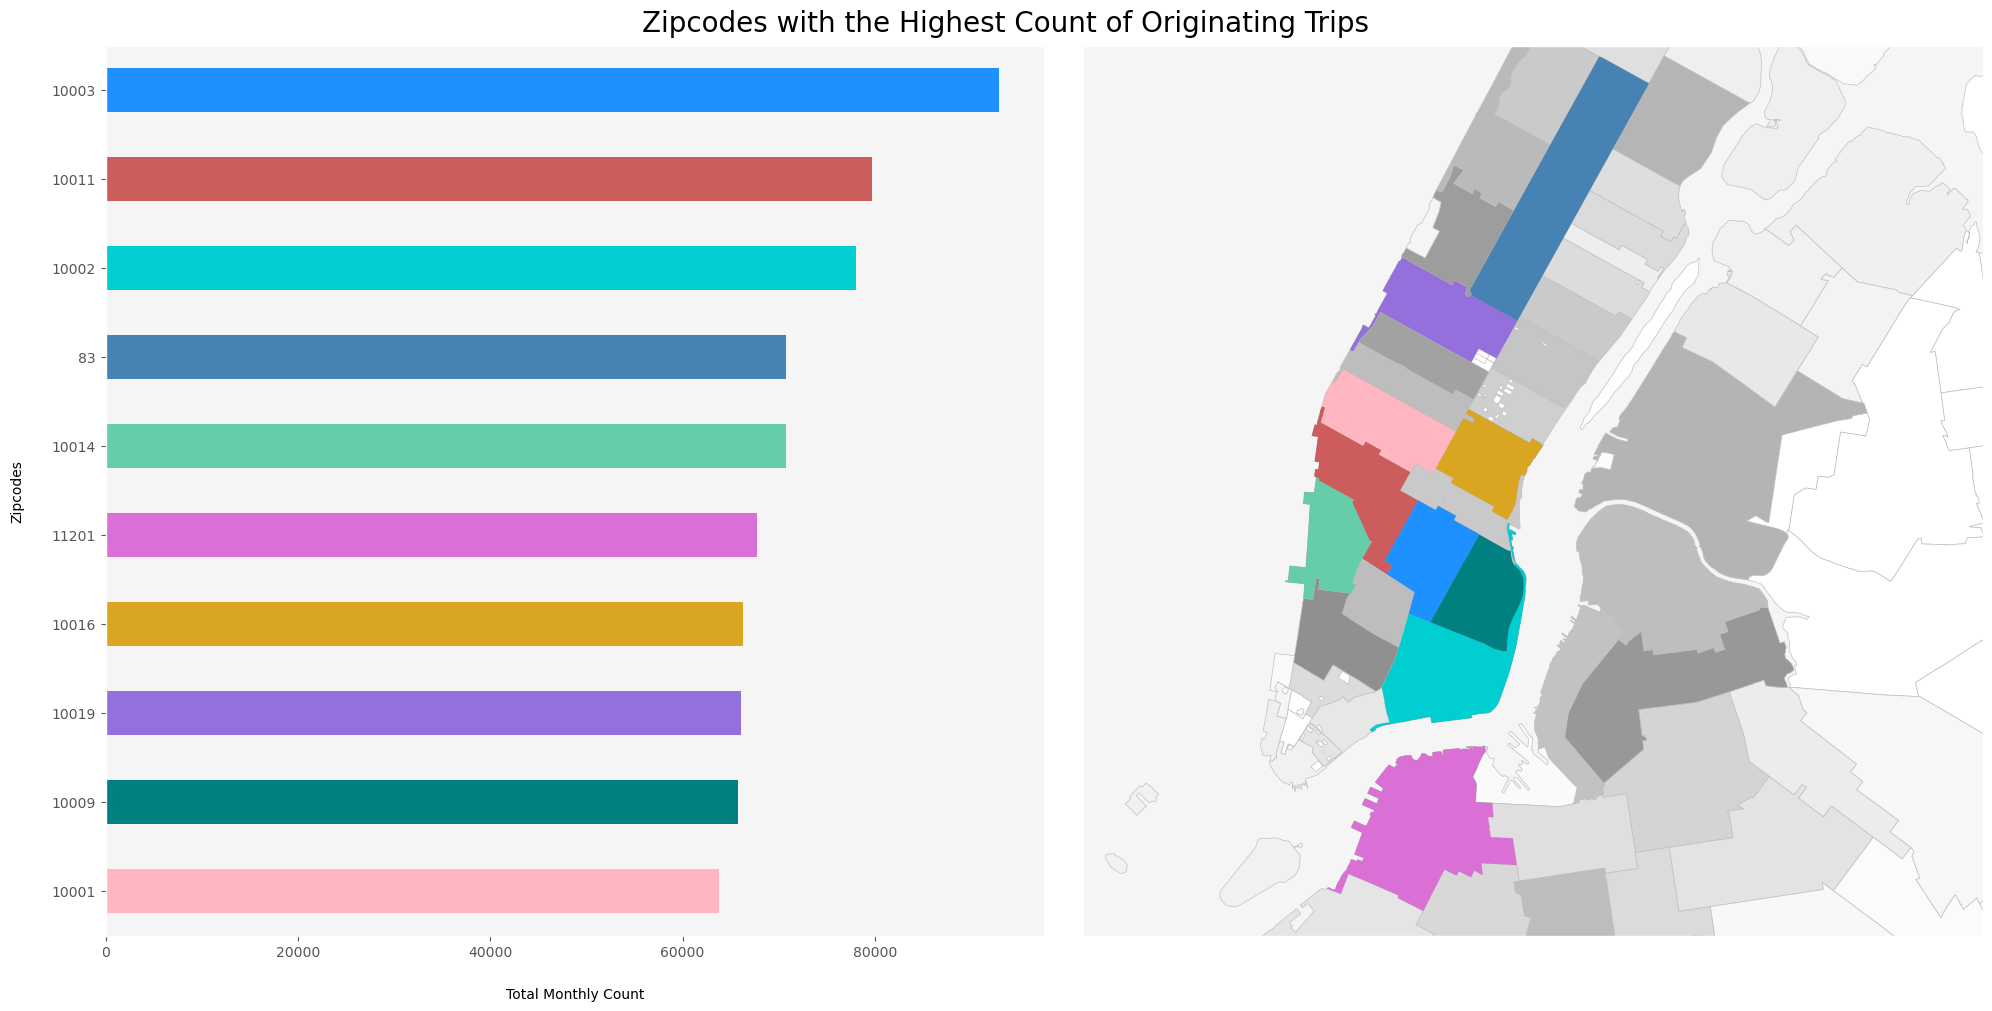

In [50]:
fig, (ax1, ax2) = plt.subplots(1,2, 
                        figsize=(20, 10),
                        sharex=False,
                        sharey=False,
                        constrained_layout=True)

fig.suptitle('Zipcodes with the Highest Count of Originating Trips', fontsize=20)

zip_count_10.plot.barh(ax = ax1, x = 'ZIPCODE', y = 'count', legend = False,
                       color = ['lightpink', 'teal','mediumpurple','goldenrod','orchid',
                               'mediumaquamarine','steelblue','darkturquoise','indianred','dodgerblue'])

ax1.set_yticklabels(zip_list)
ax1.set_ylabel('Zipcodes', labelpad = 20)
ax1.set_xlabel('Total Monthly Count', labelpad = 20)
ax1.set_facecolor("whitesmoke")
ax1.grid(False)

zip_shp.plot(ax=ax2, column='trips_count', cmap='Greys', edgecolor = 'silver', legend=False)
zip_shp.loc[zip_shp['ZIPCODE'] == 10003].plot(ax=ax2, facecolor='dodgerblue')
zip_shp.loc[zip_shp['ZIPCODE'] == 10011].plot(ax=ax2, facecolor='indianred')
zip_shp.loc[zip_shp['ZIPCODE'] == 10002].plot(ax=ax2, facecolor='darkturquoise')
zip_shp.loc[zip_shp['ZIPCODE'] == 83].plot(ax=ax2, facecolor='steelblue')
zip_shp.loc[zip_shp['ZIPCODE'] == 10014].plot(ax=ax2, facecolor='mediumaquamarine')
zip_shp.loc[zip_shp['ZIPCODE'] == 11201].plot(ax=ax2, facecolor='orchid')
zip_shp.loc[zip_shp['ZIPCODE'] == 10016].plot(ax=ax2, facecolor='goldenrod')
zip_shp.loc[zip_shp['ZIPCODE'] == 10019].plot(ax=ax2, facecolor='mediumpurple')
zip_shp.loc[zip_shp['ZIPCODE'] == 10009].plot(ax=ax2, facecolor='teal')
zip_shp.loc[zip_shp['ZIPCODE'] == 10001].plot(ax=ax2, facecolor='lightpink')

# to add black lines
#zip_shp.loc[zip_shp['ZIPCODE'] == 11201].plot(ax=ax2, facecolor='orchid', edgecolor='black', linewidth=4)
#zip_shp.loc[zip_shp['ZIPCODE'] == 10003].plot(ax=ax2, facecolor='dodgerblue', edgecolor='black', linewidth=4)

ax2.set_xlim(970000, 1015000)
ax2.set_ylim(187000, 231500)
ax2.set_facecolor("whitesmoke")
ax2.grid(False)
ax2.set_xticks([])
ax2.set_yticks([])